## Incorporating the Reimannian metric A in optimization
Requires an optimization method that can take a Hessian or a Hessian-Product as input.

[SciPy Optimize Reference](http://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/optimize.html)

In [1]:
import numpy as np
import scipy.optimize

In [2]:
ndim = 2
npts = 10
xs = np.zeros(ndim)
xt = np.ones(ndim)

def unflat(x, ndim, xs, xt):
    xall = x.reshape(x.shape[0]/ndim,ndim)
    return np.vstack((xs, xall, xt))

def flat(x):
    return x.flatten()

def optimize():
    x0 = np.random.rand(npts, ndim)
    hess = np.diag([2]*npts*ndim)
    rows = np.arange(0, npts*ndim-ndim)
    cols = np.arange(ndim, npts*ndim)
    hess[rows, cols] = -1
    hess[cols, rows] = -1
    def fn(x):
        traj = unflat(x, ndim, xs, xt)
        return 0.5*np.sum([np.linalg.norm(traj[i,:] - traj[i-1,:])**2 for i in range(1, npts+2)])
    def jac(x):
        traj = unflat(x, ndim, xs, xt)
        grad = 2*traj[1:-1,:] - traj[2:,:] - traj[0:-2,:]
        return flat(grad)
    def hessian(x):
        return hess
    xall = []
    def fn_call(x):
        xall.append(x)    
    res = scipy.optimize.minimize(fn, flat(x0), method='Newton-CG', jac=jac, hess=hessian, callback=fn_call)
    return res, np.asarray(xall)

In [3]:
res, xall = optimize()
print res['message'], ':', res['njev'], res['nfev'], res['nhev']

Optimization terminated successfully. : 20 11 10


[-0.2, 1.2, -0.2, 1.2]

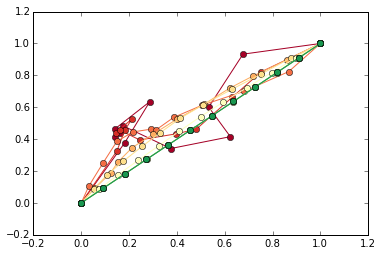

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
numplot = 10.
mycm = cm.RdYlGn
for j, i in enumerate(np.linspace(0, xall.shape[0]-1, numplot, dtype=np.int64)):
    traj = unflat(xall[i, :], ndim, xs, xt)
    im = plt.plot(traj[:, 0], traj[:, 1], 'o-', color=mycm(j/numplot))
plt.axis([-0.2, 1.2, -0.2, 1.2])

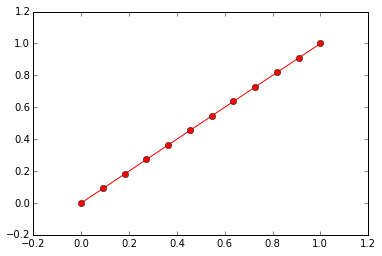

In [5]:
def animate_traj(xall, fname='traj.mp4'):
    fig = plt.figure()
    def update(i):
        traj = unflat(xall[i, :], ndim, xs, xt)
        plt.cla()
        plt.axis([-0.2, 1.2, -0.2, 1.2])
        return plt.plot(traj[:, 0], traj[:, 1], 'ro-')
    ani = animation.FuncAnimation(fig, update, frames=range(xall.shape[0]))
    ani.save(fname)
    return ani
ani = animate_traj(xall)